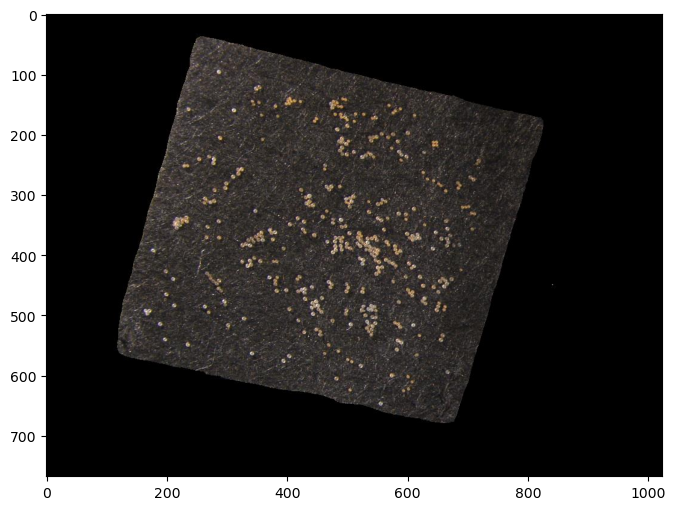

In [16]:
from skimage.io import imread
from tnia.plotting.plt_helper import imshow2d, imshow_multi2d
import os
from skimage.filters import gaussian
from skimage.color import rgb2hsv
from skimage.filters import threshold_otsu
from tnia.segmentation.separate import separate_touching, separate_touching2
from skimage.morphology import remove_small_objects
import numpy as np

tnia_images_path = r"D:\images\tnia-python-images"

im = imread(os.path.join(tnia_images_path, r"imagesc\2024_01_10_insect_egg_count\I1_F1_O20_SWI_R1_13-09-23.tif"))
            
fig = imshow2d(im)


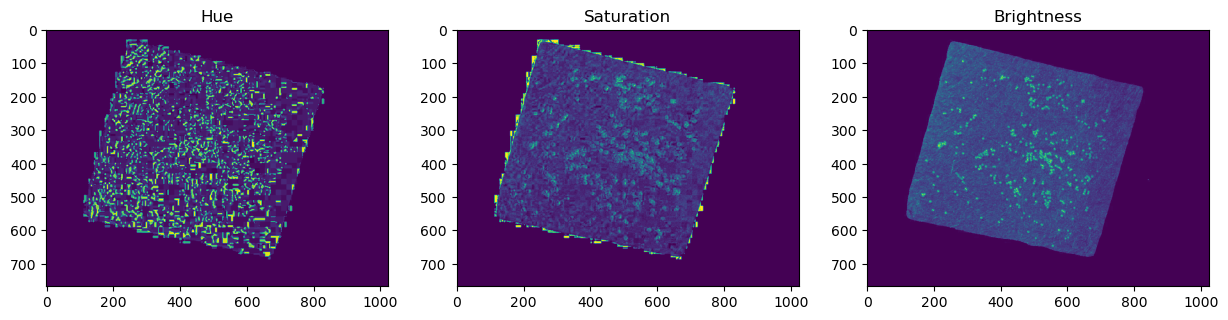

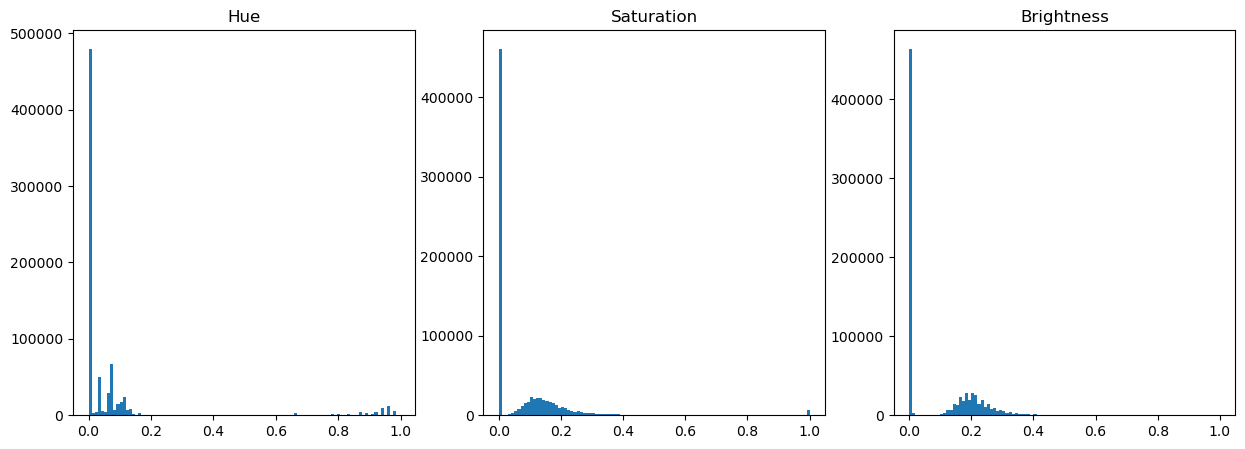

In [3]:
# convert to HSB
im_hsv = rgb2hsv(im)

fig = imshow_multi2d([im_hsv[:,:,0], im_hsv[:,:,1], im_hsv[:,:,2]], ['Hue', 'Saturation', 'Brightness'], 1, 3, width=15)

hists = []
for i in range(3):
    hists.append(np.histogram(im_hsv[:,:,i], bins=100))

fig = imshow_multi2d([im_hsv[:,:,0], im_hsv[:,:,1], im_hsv[:,:,2]], ['Hue', 'Saturation', 'Brightness'], 1, 3, width=15, height=5, plottypes=3*['hist'])

(453, 2)


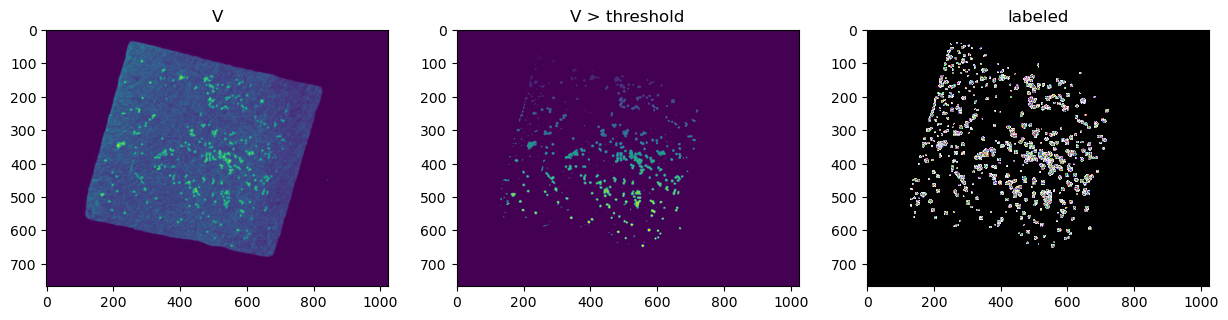

In [23]:
# apply guassian blur to hue
im_v_blur = gaussian(im_hsv[:,:,2], sigma=1)
# apply otsu threshold 
thresholded = im_v_blur>threshold_otsu(im_v_blur[im_v_blur>0])
# watershed to separate then label

intensity_to_use = im_v_blur*thresholded

#separated, labeled, _ = separate_touching(thresholded, 1, 0)
separated, distance, peaks = separate_touching2(intensity_to_use, thresholded, 5, 1, 1)

from skimage.measure import label
labeled = label(separated, connectivity=1)

# import random lable colormap
from tnia.plotting.plt_helper import random_label_cmap

fig = imshow_multi2d([im_v_blur, separated, labeled], ['V', 'V > threshold','labeled'], 1, 3, width=15, colormaps=[None, None, random_label_cmap()])

In [24]:
import napari
viewer = napari.Viewer()
viewer.add_image(im_v_blur)
viewer.add_image(distance, name='distance')
viewer.add_image(peaks, name='peaks')
viewer.add_image(thresholded)
viewer.add_labels(labeled)

<Labels layer 'labeled' at 0x2298d515a30>